### **Objective**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. The main objective of this task is to predict the survival rate of passengers in Titanic iceberg incident using certain factors.

#### Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing dataset

In [5]:
titanic = pd.read_csv("titanic/train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Part 1: Exploratory Data Analysis (EDA)**

In [7]:
titanic.shape

(891, 12)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Visualisation Examples

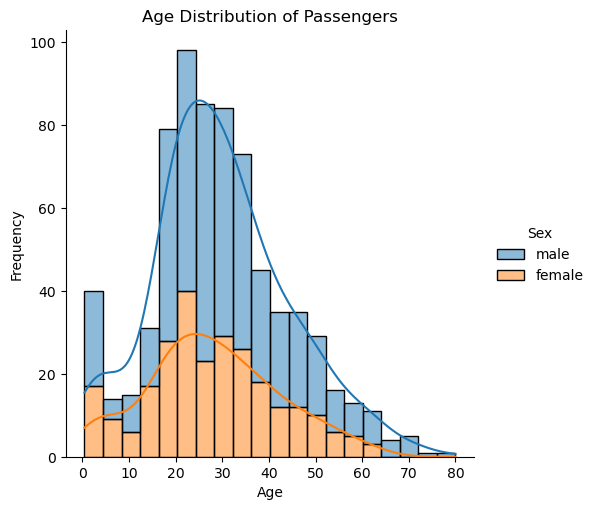

In [11]:
sns.displot(x='Age', data = titanic, kind='hist', kde=True, hue='Sex', multiple='stack')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Passengers')
plt.show()

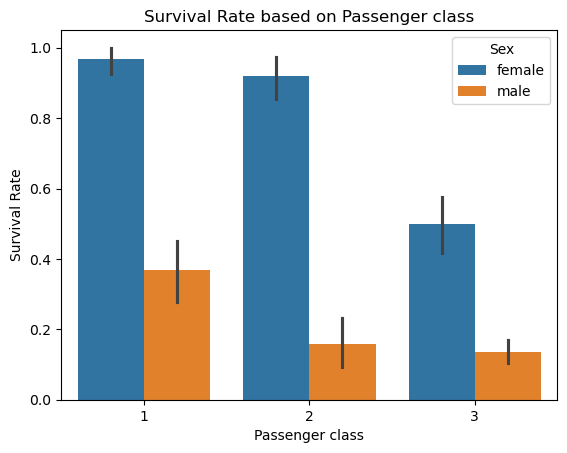

In [12]:
sns.barplot(x='Pclass', y='Survived', data=titanic, hue='Sex')
plt.xlabel('Passenger class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate based on Passenger class')
plt.show()

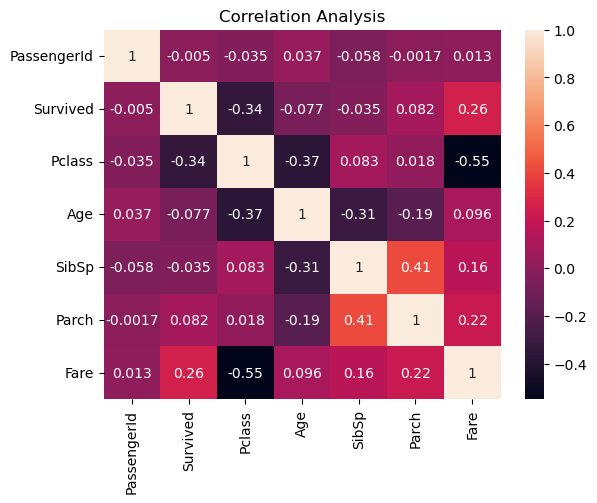

In [13]:
num_cols = titanic.select_dtypes(['int64','float64']).columns
df1 = titanic[num_cols]
sns.heatmap(df1.corr(), annot=True)
plt.title("Correlation Analysis")
plt.show()

### **Part 2: Handling Missing Values**

In [15]:
titanic['Age'].isnull().sum()

177

In [16]:
titanic['Title'] = titanic['Name'].str.split(",").str.get(1)
titanic['Title'] = titanic['Title'].str[0:5].str.strip()
titanic['Title'].value_counts()

Title
Mr.     517
Miss    182
Mrs.    125
Mast     40
Dr.       7
Rev.      6
Mlle      2
Majo      2
Col.      2
the       1
Capt      1
Ms.       1
Sir.      1
Lady      1
Mme.      1
Don.      1
Jonk      1
Name: count, dtype: int64

In [17]:
# Extract Titles
titanic['Title'] = titanic['Name'].str.extract(r'(Mr\.|Miss|Mrs\.|Dr\.|Sir\.|)')
titanic['Title'] = titanic['Title'].fillna("NA")
# Modify Age Based on Titles
age_adjustments = {
    'Mr.': lambda age: age + 5,  # Example: Increase age for "Master"
    'Dr.': lambda age: age - 3,     # Example: Decrease age for "Dr."
    'Miss': lambda age: age-4,
    'Mrs.': lambda age: age+6,
    'Sir.': lambda age: age + 8
}

titanic['Age'] = titanic.apply(lambda row: age_adjustments.get(row['Title'], lambda x: x)(row['Age']) if row['Title'] in age_adjustments else row['Age'], axis=1)

In [18]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mode()[0])

In [19]:
titanic['Age'].isnull().sum()

0

In [20]:
titanic['Fare'] = titanic['Fare'].fillna(np.percentile(titanic['Fare'], 50))

In [21]:
titanic['Fare'].isnull().sum()

0

In [22]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

In [23]:
titanic['Embarked'].isnull().sum()

0

In [24]:
titanic.drop('Cabin', axis=1,inplace=True)

In [25]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,


### **Part 3: Feature Engineering**

In [27]:
### creating a new feature
titanic['FamilySize'] = titanic['Parch']+titanic['SibSp']+1
titanic['FamilySize']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,,1


In [29]:
# Convert Age into Categories
titanic['AgeCategory'] = pd.cut(titanic['Age'], 
                           bins=[0, 12, 19, 59, float('inf')], 
                           labels=['Child','Teen','Adult','Senior'])

# Convert FamilySize into Categories
titanic['FamilyCategory'] = pd.cut(titanic['FamilySize'], 
                              bins=[0, 1, 4, float('inf')], 
                              labels=['Single', 'Small Family', 'Large Family'])


In [30]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,AgeCategory,FamilyCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,,2,Adult,Small Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,,2,Adult,Small Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,,1,Adult,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,,2,Adult,Small Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,,1,Adult,Single


### **Part 4: One-Hot Encoding**

In [32]:
pd.get_dummies(titanic, columns = ['Sex','Embarked','Pclass','FamilyCategory'])

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Title,FamilySize,...,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,FamilyCategory_Single,FamilyCategory_Small Family,FamilyCategory_Large Family
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,,2,...,True,False,False,True,False,False,True,False,True,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,,2,...,False,True,False,False,True,False,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,,1,...,False,False,False,True,False,False,True,True,False,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,,2,...,False,False,False,True,True,False,False,False,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,,1,...,True,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,,1,...,True,False,False,True,False,True,False,True,False,False
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,,1,...,False,False,False,True,True,False,False,True,False,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",24.0,1,2,W./C. 6607,23.4500,,4,...,False,False,False,True,False,False,True,False,True,False
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,,1,...,True,True,False,False,True,False,False,True,False,False


### **Part 5: Decision Tree Implementation**

In [89]:
x = titanic[['Pclass','SibSp', 'Parch']]
y = titanic['Survived']

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtree.fit(x_train, y_train)
y_predict = dtree.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support
print("Accuracy score: ", accuracy_score(y_test,y_predict))
print("Classification Report: \n", classification_report(y_test,y_predict))
print("Precision-Recall-F1 score: \n", precision_recall_fscore_support(y_test, y_predict))

Accuracy score:  0.7318435754189944
Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       105
           1       0.70      0.62      0.66        74

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179

Precision-Recall-F1 score: 
 (array([0.75221239, 0.6969697 ]), array([0.80952381, 0.62162162]), array([0.77981651, 0.65714286]), array([105,  74], dtype=int64))


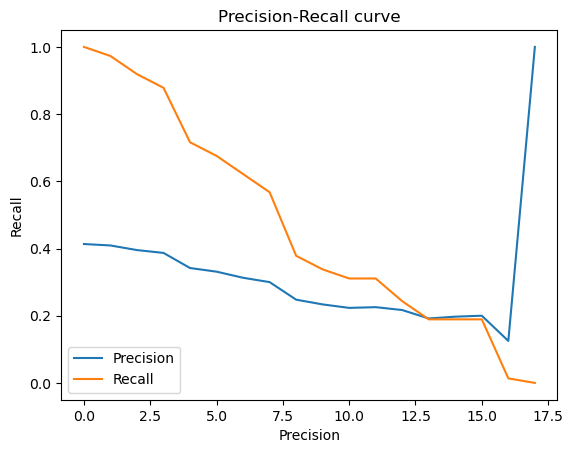

In [97]:
from sklearn.metrics import precision_recall_curve

prec, rec, _ = precision_recall_curve(y_test, dtree.predict_proba(x_test)[:,:1])
plt.plot(prec, label='Precision')
plt.plot(rec, label='Recall')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(['Precision','Recall'])
plt.title('Precision-Recall curve')
plt.show()

In [99]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [4, 8, 16, 32],
    'max_leaf_nodes': [3, 9, 15, 24]
}
grid_cv = GridSearchCV(estimator=dtree, param_grid=params, cv=5, n_jobs=-1, verbose=2)
grid_cv.fit(x_train, y_train)
print('Decision tree classifier: ')
print('Best parameters: ', grid_cv.best_params_)
print('Best estimators: ', grid_cv.best_estimator_)
print('Best score: ', grid_cv.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Decision tree classifier: 
Best parameters:  {'max_depth': 10, 'max_leaf_nodes': 15, 'min_samples_split': 32}
Best estimators:  DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=15,
                       min_samples_split=32, random_state=42)
Best score:  0.6882005318625037


In [101]:
best_clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=9, min_samples_split=4, random_state=42)
best_clf1.fit(x_train, y_train)
preds = best_clf1.predict(x_test)
print('Accuracy with best parameters: ', accuracy_score(y_test, preds))

Accuracy with best parameters:  0.7318435754189944


In [105]:
from sklearn.tree import export_text
rules = export_text(dtree, feature_names=['Pclass','SibSp','Parch'])
print(rules)

|--- Pclass <= 2.50
|   |--- Parch <= 0.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- SibSp <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- SibSp >  0.50
|   |   |   |   |--- SibSp <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- SibSp >  1.50
|   |   |   |   |   |--- class: 1
|   |   |--- Pclass >  1.50
|   |   |   |--- SibSp <= 2.50
|   |   |   |   |--- SibSp <= 1.50
|   |   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- SibSp >  0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- SibSp >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- SibSp >  2.50
|   |   |   |   |--- class: 1
|   |--- Parch >  0.50
|   |   |--- Parch <= 3.50
|   |   |   |--- Parch <= 2.50
|   |   |   |   |--- Pclass <= 1.50
|   |   |   |   |   |--- Parch <= 1.50
|   |   |   |   |   |   |--- SibSp <= 0.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- SibSp >  0.50
|   |   |   |   |   |   |   |--- clas

#### Predicting against test data

In [107]:
test_df = pd.read_csv("titanic/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [109]:
X_test = test_df[['Pclass', 'SibSp', 'Parch']]
test_df['Survived'] = dtree.predict(X_test)
test_df.to_csv("submission_Titanic.csv", columns=['PassengerId','Survived'], index=False)

### Random Forest vs Decision Tree Classifier

In [113]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, max_depth=18, random_state=42)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_probs = model.predict_proba(x_test)
print("Accuracy score: ", accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

Accuracy score:  0.7318435754189944
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       105
           1       0.70      0.62      0.66        74

    accuracy                           0.73       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.73      0.73       179



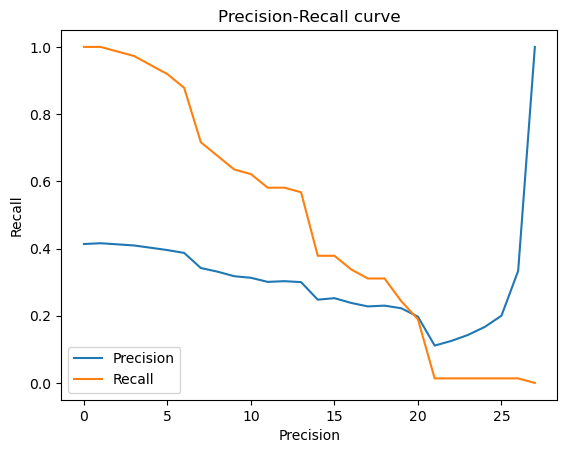

In [117]:
from sklearn.metrics import precision_recall_curve

prec, rec, _ = precision_recall_curve(y_test, y_probs[:,:1])
plt.plot(prec, label='Precision')
plt.plot(rec, label='Recall')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(['Precision','Recall'])
plt.title('Precision-Recall curve')
plt.show()

In [121]:
# Random forest classifier - Cloud today
params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10,25,50],
    'max_depth': [6,12,18]
}
#grid search
grid_ser = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=2)
grid_ser.fit(x_train, y_train)
print('Random forest classifier: ')
print('Best parameters: ', grid_ser.best_params_)
print('Best estimators: ', grid_ser.best_estimator_)
print('Best score: ', grid_ser.best_score_)
print('Accuracy: ', accuracy_score(y_test, grid_ser.predict(x_test)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random forest classifier: 
Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50}
Best estimators:  RandomForestClassifier(max_depth=6, n_estimators=50, random_state=42)
Best score:  0.6952723333005023
Accuracy:  0.7206703910614525


### Conclusion

Both classifiers performed nearly well.

Decision tree classifier achieved 72% accuracy while Random forest classifier achieved 73% accuracy.

# **THE END**